In [1]:

import numpy as np
from experiments.cube.Cube import Cube
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from sklearn.decomposition import PCA
from hdimvis.visualise_layouts_and_metrics.plot import show_generation_metrics, show_layout
from  sklearn.manifold import SpectralEmbedding
from hdimvis.algorithms.spring_force_algos.hybrid_algo.Hybrid import Hybrid
from experiments.utils.LayoutHistogram import LayoutHistogram
from experiments.utils.layout_shannon_entropy import calculate_entropy
from hdimvis.metrics.stress.stress import vectorised_stress
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import euclidean,manhattan
from pathlib import Path


In [2]:

rna = DataFetcher.fetch_data('coil20')


####################
Fetching the "coil20" dataset
####################
Dataset loaded
Dataset shape: (1440, 1024)
####################


In [3]:

sizes = np.sort(np.tile(np.arange(1,40), (1,2)))
spring_constants = np.linspace(0.001, 1, 20)
results = np.zeros((39, 21))
results[:,0] = np.arange(2,41)



In [4]:



for j, sc in enumerate(spring_constants):

    collapsed = False
    i = 0
    neighbour_update = True
    n_size = 1
    s_size = 1

    while not collapsed and (n_size + s_size) < 20:

        algo96 = Chalmers96(dataset=rna,  distance_fn=euclidean,
                    damping_constant=0, spring_constant=sc, sc_scaling_factor=1,
                    use_knnd=False, sample_set_size=s_size, neighbour_set_size=n_size)
        layout_96 = LayoutCreation.create_layout(algo96, optional_metric_collection={"Average speed": 1}, no_iters=50)

        initial_speed = sum(layout_96.collected_metrics["Average speed"][1][:50])/50
        final_speed = sum(layout_96.collected_metrics["Average speed"][1][-50:])/50

        if (final_speed/initial_speed > 10): # i.e. if layout "collapsed"
            print("COLLAPSED !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            results[i,j+1] = 1
            collapsed = True
        else:
            if neighbour_update:
                n_size +=1
            else:
                s_size += 1
            neighbour_update = not neighbour_update
            i += 1




####################
The algorithm will use a random initialization for the low D embedding/layout
 scaling factor: 1
####################
A 2D layout of the "coil20" dataset will be created 
using the "Chalmers' 1996" algorithm
####################
The HD distance measure used is: euclidean
####################
"Average speed" will be measured on every iteration
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.001 
Damping constant is set to 0 
Spring constant scaling factor is set to 1 
####################
####################
The algorithm will use a random initialization for the low D embedding/layout
 scaling factor: 1
####################
A 2D layout of the "coil20" dataset will be created 
using the "Chalmers' 1996" algorithm
####################
The HD distance measure used is: euclidean
####################
"Average speed" will be measured on every iteration
####################
All stres

In [5]:
print(results)

[[ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [13.  0.  0.  0.  0.

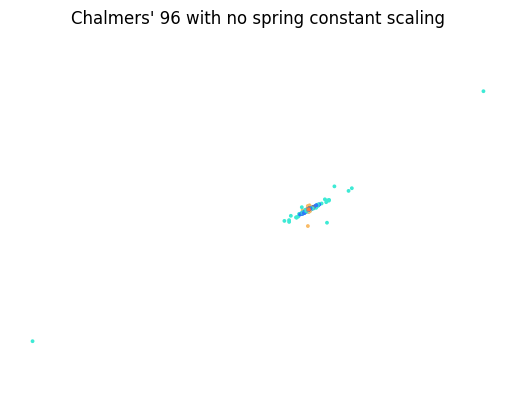

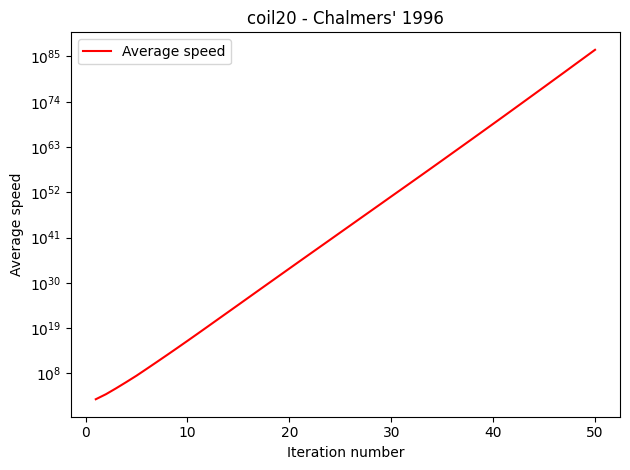

In [6]:
show_layout(layout=layout_96, title="Chalmers' 96 with no spring constant scaling", use_labels=True)
show_generation_metrics(layout_96, average_speed=True, stress=False, log_scale=True)